In [1]:
import pandas as pd
import numpy as np

data_1 = pd.read_csv('95c03c589c246cc7b67e5f91944f5fc4/2087604_42.79_-78.40_2007.csv',header=1)
data_2 = pd.read_csv('95c03c589c246cc7b67e5f91944f5fc4/2087604_42.79_-78.40_2008.csv',header=1)
data_3 = pd.read_csv('95c03c589c246cc7b67e5f91944f5fc4/2087604_42.79_-78.40_2009.csv',header=1)
data_4 = pd.read_csv('95c03c589c246cc7b67e5f91944f5fc4/2087604_42.79_-78.40_2010.csv',header=1)
data_5 = pd.read_csv('95c03c589c246cc7b67e5f91944f5fc4/2087604_42.79_-78.40_2011.csv',header=1)
data_6 = pd.read_csv('95c03c589c246cc7b67e5f91944f5fc4/2087604_42.79_-78.40_2012.csv',header=1)

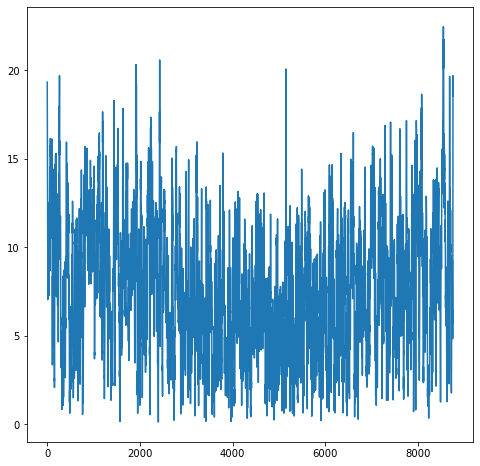

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(data_1['wind speed at 100m (m/s)'])

In [3]:
new_d = pd.DataFrame(data_1,columns=['air temperature at 100m (C)', 'air pressure at 100m (Pa)','wind speed at 100m (m/s)'])
d_1 = new_d['wind speed at 100m (m/s)'].to_numpy()
d_2 = data_2['wind speed at 100m (m/s)'].to_numpy()
d_3 = data_3['wind speed at 100m (m/s)'].to_numpy()
d_4 = data_4['wind speed at 100m (m/s)'].to_numpy()
d_5 = data_5['wind speed at 100m (m/s)'].to_numpy()
d_6 = data_6['wind speed at 100m (m/s)'].to_numpy()

for i in [d_1, d_2, d_3, d_4, d_5,d_6]:
    print(f'{str(i)} dataset length = {len(i)}')
    


[19.34 18.22 17.5  ... 19.7  19.6  18.56] dataset length = 8760
[ 6.96  9.26 10.12 ...  7.1   7.21  7.38] dataset length = 8760
[ 8.7   8.67  8.26 ... 10.7   9.37  9.07] dataset length = 8760
[6.24 6.15 6.34 ... 6.51 6.63 6.64] dataset length = 8760
[12.65 11.87 12.76 ... 12.98 13.25 12.75] dataset length = 8760
[6.84 7.05 7.19 ... 8.8  6.23 7.61] dataset length = 8784


In [4]:
s = np.append(d_1,d_2[0:720])

print(len(s))
print(s)

9480
[19.34 18.22 17.5  ... 13.57 13.98 14.79]


In [5]:
from sklearn.preprocessing import MinMaxScaler
s = np.array(s).reshape(-1,1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(s)
print('Mean value of datase',data_scaled.mean(axis=0))
print('Std of dataset',data_scaled.std(axis=0))
print('Max value of dataset',data_scaled.max(axis=0))
print('MIn value of dataset',data_scaled.min(axis=0))
print('length of dataset',len(data_scaled))
print(data_scaled)

Mean value of datase [0.33890469]
Std of dataset [0.17345975]
Max value of dataset [1.]
MIn value of dataset [0.]
length of dataset 9480
[[0.85989257]
 [0.80975828]
 [0.7775291 ]
 ...
 [0.60161146]
 [0.61996419]
 [0.65622202]]


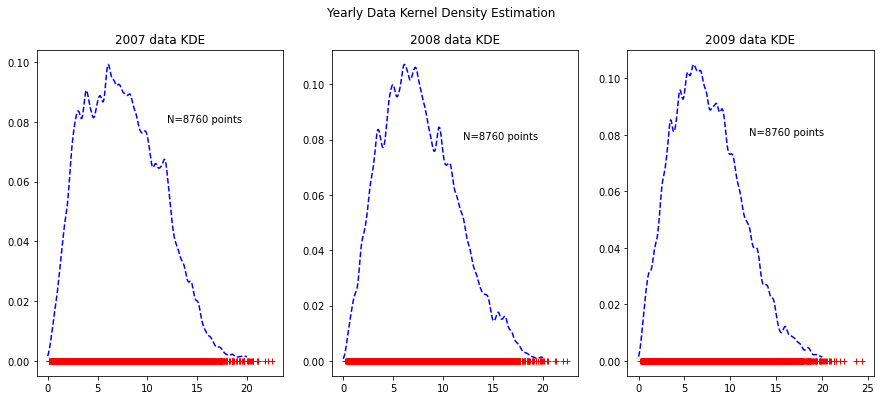

In [76]:
# KDE
import seaborn as sns
from sklearn.neighbors import KernelDensity
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.suptitle('Yearly Data Kernel Density Estimation')

for i in range(1,4):
    # perform KDE
    x = 8760 * i
    Xkde = s[x-8760:x]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(Xkde)

    # prepare the grid
    X_plot = np.linspace(0, 20, 1000)[:, np.newaxis]

    # evaluate the log density model on the data using the KDE 
    log_dens = kde.score_samples(X_plot)

    # plot the data distribution and probability density function
    axs[i-1].plot(X_plot, np.exp(log_dens), 'b--')
    axs[i-1].plot(Xkde[:, 0], np.zeros(Xkde.shape[0]), '+r')
    axs[i-1].set_title(str(2007+i-1)+ ' data KDE')
    axs[i-1].text(12, 0.08, "N={0} points".format(8760), horizontalalignment='left' )
plt.show()

In [199]:
from sklearn.preprocessing import MinMaxScaler
x_1 = data_1[['air pressure at 100m (Pa)','air temperature at 100m (C)']].to_numpy()
print(x_1.shape)
y_1 = data_1['wind speed at 100m (m/s)'].to_numpy().reshape(-1,1)

x_pred = data_2[['air pressure at 100m (Pa)','air temperature at 100m (C)']].drop(labels=range(720,8760),axis=0).to_numpy()
y_pred = data_2['wind speed at 100m (m/s)'].drop(labels=range(720,8760),axis=0).to_numpy().reshape(-1,1)

x_1 = np.vstack((x_1,x_pred))
y_1 = np.vstack((y_1,y_pred))

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_1)
y_scaled = scaler.fit_transform(y_1)

x_1 = pd.DataFrame(x_scaled,columns=['air pressure at 100m (Pa)','air temperature at 100m (C)'])
y_1 = pd.DataFrame(y_scaled,columns=['wind speed at 100m (m/s)'])


x_tr = x_1.drop(labels=range(8760,9480),axis=0)
y_tr = y_1.drop(labels=range(8760,9480),axis=0)
x_te = x_1.drop(labels=range(8760),axis=0)
y_te = y_1.drop(labels=range(8760),axis=0)
print(x_tr.shape)
print(x_te.shape)

(8760, 2)
      air pressure at 100m (Pa)  air temperature at 100m (C)
0                      0.420382                     0.568501
1                      0.424628                     0.572194
2                      0.430998                     0.570532
3                      0.424628                     0.577179
4                      0.424628                     0.574040
...                         ...                          ...
8755                   0.541401                     0.533235
8756                   0.515924                     0.542282
8757                   0.488323                     0.551145
8758                   0.458599                     0.559084
8759                   0.437367                     0.559453

[8760 rows x 2 columns]
      air pressure at 100m (Pa)  air temperature at 100m (C)
8760                   0.498938                     0.444055
8761                   0.475584                     0.449778
8762                   0.452229                   

In [211]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
nwp_svr_rmse = []
nwp_svr_mape = []
nwp_svr_bias = []
y_tr = np.ravel(y_tr)
y_te = np.ravel(y_te)
m = SVR(kernel='poly',degree=5)
m.fit(x_tr,y_tr)
svr_pre = m.predict(x_te)
svr_rmse = mean_squared_error(y_te,svr_pre)
svr_mape = mean_absolute_percentage_error(y_te,svr_pre)
svr_bias = bias_S(y_te,svr_pre)
nwp_svr_rmse.append(svr_rmse)
nwp_svr_mape.append(svr_mape)
nwp_svr_bias.append(svr_bias)



In [212]:
print(nwp_svr_rmse)
print(nwp_svr_mape)
print(nwp_svr_bias)

[0.03718332932573468]
[72.53906290865709]
[0.04513085523427899]


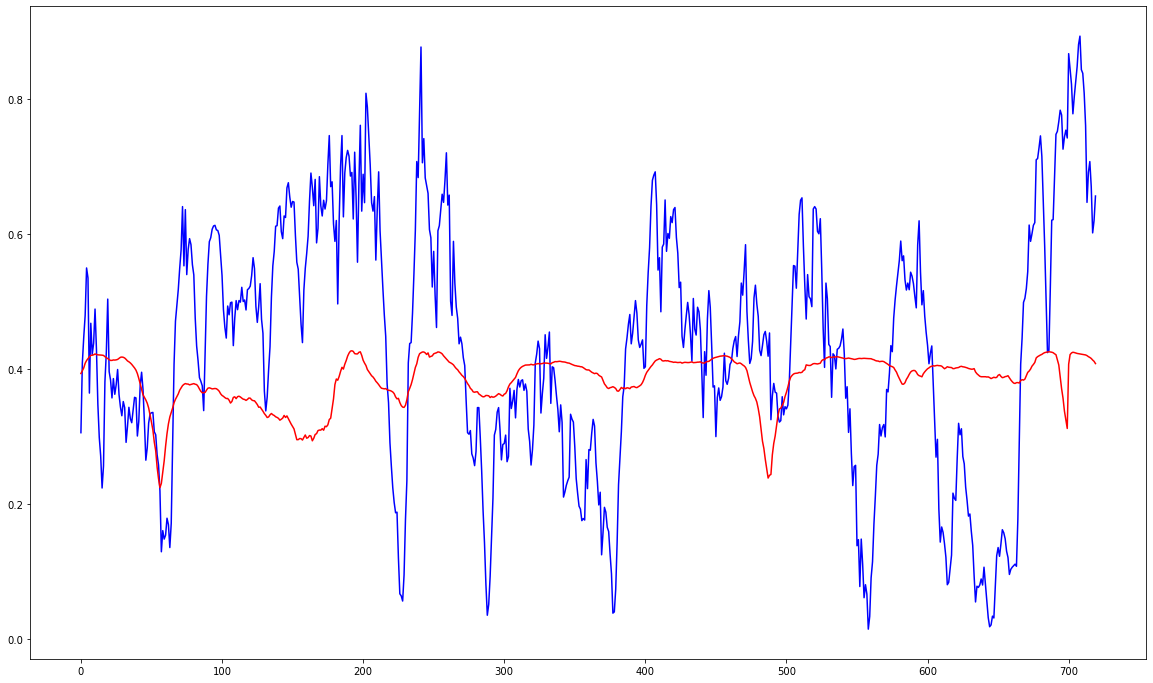

In [213]:
plt.figure(figsize=(20,12))
plt.plot(y_te,color='b')
plt.plot(svr_pre,color='r')


In [6]:
t_d = pd.concat([data_1,data_2[0:720]],ignore_index=True)['Date'].tolist()
new_t = []
for i in range(len(t_d)):
    t_d[i] = t_d[i].replace('/','-')
from datetime import tzinfo, timedelta, datetime
import matplotlib.dates as mdates

# dts = [dt.strftime('%Y-%m-%d T%H:%M Z') for dt in 
#        datetime_range(datetime(2007, 1, 1, 0), datetime(2008, 1, 30, 23), 
#        timedelta(minutes=60))]
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day
dti = pd.date_range("2007-01-01", periods=9480, freq="1H")
dti = dti.map(mdates.date2num)
dti= np.array(dti)
dti

array([732677.        , 732677.04166667, 732677.08333333, ...,
       733071.875     , 733071.91666667, 733071.95833333])

In [56]:
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
import time 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
data_scaled = np.ravel(data_scaled)
prx = np.array([i for i in range(8761,8785)]).reshape(-1,1)

m = 600
nrmse = []
nmape = []
biass = []
predm1 = []
predm2 = []
predm3 = []
predm4 = []
m1t = 0
m2t = 0
m3t = 0
m4t = 0
d_1 = data_scaled[:8760].reshape(-1,1)
d_2 = data_scaled[:8760].reshape(-1,1)
d_3 = data_scaled[:8760].reshape(-1,1)
d_4 = data_scaled[8760:].reshape(-1,1)
d_5 = data_scaled[:8760].reshape(-1,1)
day = 0
for i in range(1,721):
    if (i+1) % 24 == 0: 
        day +=1
        print('day {} processing...'.format(day))
    x = dti[8760-m+i-1:8760+i-1].reshape(-1,1)
    y_1 = np.ravel(d_1[8760-m+i-1:8760+i-1])
    y_2 = np.ravel(d_2[8760-m+i-1:8760+i-1])
    y_3 = np.ravel(d_3[8760-m+i-1:8760+i-1])
    y_4 = np.ravel(d_5[8760-m+i-1:8760+i-1])
    
    # model_1
    st_t = time.time()
    m_1 = SVR(kernel='rbf')
    m_1.fit(x,y_1)
    pred = m_1.predict(dti[8760+i-1].reshape(-1,1))
    predm1.append(pred)
    et_t = time.time()
    m1t += et_t-st_t
    d_1 = np.append(d_1,pred)
    
    # model_2
    st_t = time.time()
    m_2 = AdaBoostRegressor(learning_rate=2)
    m_2.fit(x,y_2)
    pred = m_2.predict(dti[8760+i-1].reshape(-1,1))
    predm2.append(pred)
    et_t = time.time()
    m2t += et_t-st_t
    d_2 = np.append(d_2,pred)
    
    # model_3
    st_t = time.time()
    m_3 = KNeighborsRegressor(n_neighbors=3)
    m_3.fit(x,y_3)
    pred = m_3.predict(dti[8760+i-1].reshape(-1,1))
    predm3.append(pred)
    et_t = time.time()
    m3t += et_t-st_t
    d_3 = np.append(d_3,pred)
    
    # model_4
    st_t = time.time()
    m_4 = GradientBoostingRegressor()
    m_4.fit(x,y_4)
    pred = m_4.predict(dti[8760+i-1].reshape(-1,1))
    predm4.append(pred)
    et_t = time.time()
    m4t += et_t-st_t
    d_5 = np.append(d_5,pred)

day 1 processing...
day 2 processing...
day 3 processing...
day 4 processing...
day 5 processing...
day 6 processing...
day 7 processing...
day 8 processing...
day 9 processing...
day 10 processing...
day 11 processing...
day 12 processing...
day 13 processing...
day 14 processing...
day 15 processing...
day 16 processing...
day 17 processing...
day 18 processing...
day 19 processing...
day 20 processing...
day 21 processing...
day 22 processing...
day 23 processing...
day 24 processing...
day 25 processing...
day 26 processing...
day 27 processing...
day 28 processing...
day 29 processing...
day 30 processing...


In [57]:

predm1_t = scaler.inverse_transform(predm1)
predm2_t = scaler.inverse_transform(predm2)
predm3_t = scaler.inverse_transform(predm3)
predm4_t = scaler.inverse_transform(predm4)
true = scaler.inverse_transform(data_scaled.reshape(-1,1))[8760:]

In [144]:
print(m1t)
print(m2t)
print(m3t)
print(m4t)



6.381569147109985
23.927586793899536
1.182743787765503
31.05879235267639


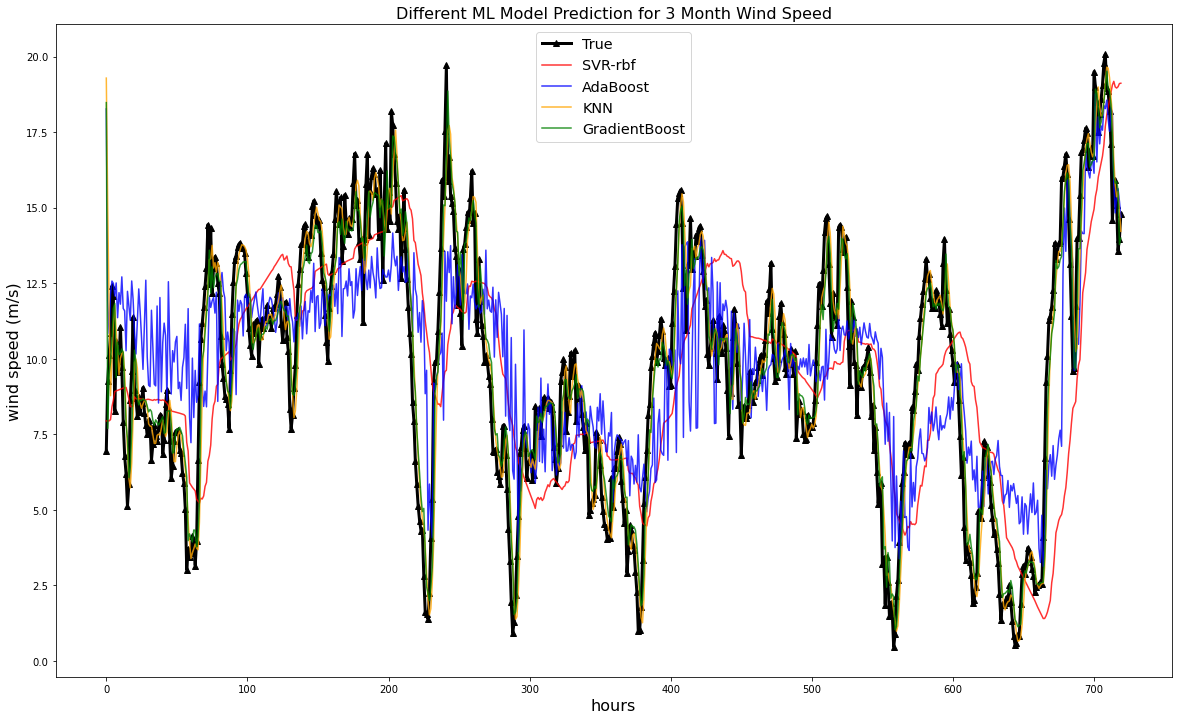

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(true,color='black',marker='^', mfc='black', label='True',lw=3)
plt.plot(predm1_t,color='r',label='SVR-rbf',alpha=0.8)
plt.plot(predm2_t,color='b',label='AdaBoost',alpha=0.8)
plt.plot(predm3_t,color='orange',label='KNN',alpha=0.8)
plt.plot(predm4_t,color='g',label='GradientBoost',alpha=0.8)
plt.title('Different ML Model Prediction for 3 Month Wind Speed',fontsize=16)
plt.ylabel('wind speed (m/s)',fontsize=16)
plt.xlabel('hours',fontsize=16)
plt.legend(fontsize='x-large')

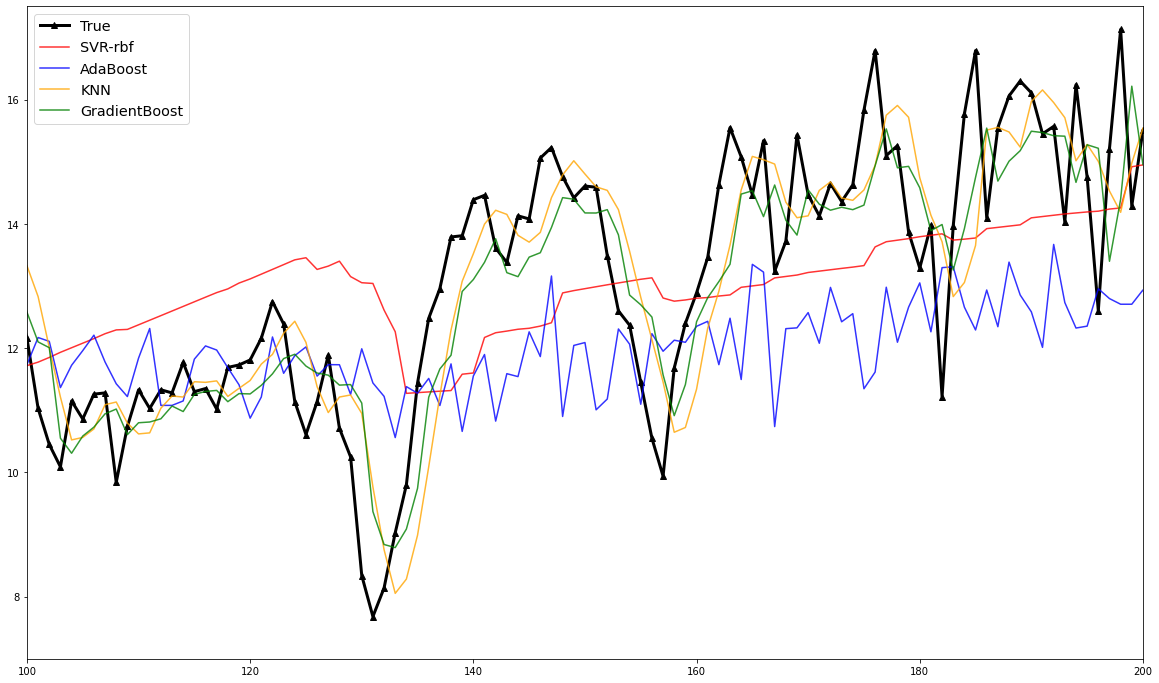

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(true,color='black',marker='^', mfc='black', label='True',lw=3)
plt.plot(predm1_t,color='r',label='SVR-rbf',alpha=0.8)
plt.plot(predm2_t,color='b',label='AdaBoost',alpha=0.8)
plt.plot(predm3_t,color='orange',label='KNN',alpha=0.8)
plt.plot(predm4_t,color='g',label='GradientBoost',alpha=0.8)
plt.xlim(100,200)
plt.ylim(7,17.5)
plt.legend(fontsize='x-large')

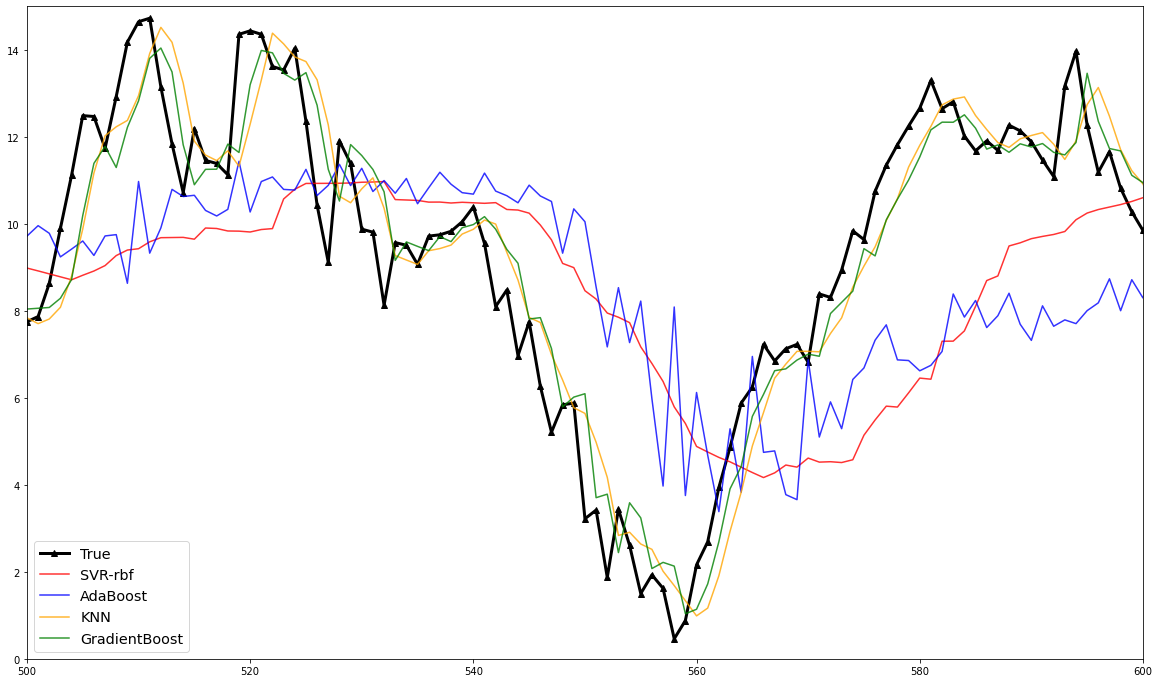

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(true,color='black',marker='^', mfc='black', label='True',lw=3)
plt.plot(predm1_t,color='r',label='SVR-rbf',alpha=0.8)
plt.plot(predm2_t,color='b',label='AdaBoost',alpha=0.8)
plt.plot(predm3_t,color='orange',label='KNN',alpha=0.8)
plt.plot(predm4_t,color='g',label='GradientBoost',alpha=0.8)
plt.xlim(500,600)
plt.ylim(0,15)
plt.legend(fontsize='x-large')

In [109]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def bias_S(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sum(y_true-y_pred)/len(y_true)

In [113]:
from sklearn.metrics import mean_squared_error
rmse_list = []
mape_list = []
bias_list = []
rmse_1 = mean_squared_error(true, predm1_t,squared='False')
rmse_list.append(rmse_1)
rmse_2 = mean_squared_error(true, predm2_t,squared='False')
rmse_list.append(rmse_2)
rmse_3 = mean_squared_error(true, predm3_t,squared='False')
rmse_list.append(rmse_3)
rmse_4 = mean_squared_error(true, predm4_t,squared='False')
rmse_list.append(rmse_4)
mape_1 = mean_absolute_percentage_error(true, predm1_t)
mape_list.append(mape_1)
mape_2 = mean_absolute_percentage_error(true, predm2_t)
mape_list.append(mape_2)
mape_3 = mean_absolute_percentage_error(true, predm3_t)
mape_list.append(mape_3)
mape_4 = mean_absolute_percentage_error(true, predm4_t)
mape_list.append(mape_4)
b_1 = bias_S(true, predm1_t)
bias_list.append(b_1)
b_2 = bias_S(true, predm2_t)
bias_list.append(b_2)
b_3 = bias_S(true, predm3_t)
bias_list.append(b_3)
b_4 = bias_S(true, predm4_t)
bias_list.append(b_4)


print('The RMSE of SVM-rbf, AdaBoost, KNN, and GradientBoost model is {},respectively'.format(rmse_list))
print('The MAPE of SVM-rbf, AdaBoost, KNN, and GradientBoost model is {},respectively'.format(mape_list))
print('The Bias of SVM-rbf, AdaBoost, KNN, and GradientBoost model is {},respectively'.format(bias_list))

from pmdarima.arima.utils import ndiffs
import pandas as pd
print(data_scaled.shape)
df = pd.DataFrame(data_scaled)
y=df.values
print(ndiffs(y, test='adf'))
print(ndiffs(y, test='kpss'))
print(ndiffs(y, test='pp'))

The RMSE of SVM-rbf, AdaBoost, KNN, and GradientBoost model is [11.441493770737184, 9.043786001109693, 2.1830337345679016, 1.7051686833768347],respectively
The MAPE of SVM-rbf, AdaBoost, KNN, and GradientBoost model is [45.91287115143018, 47.055883817611, 16.128717935589307, 14.97532471395841],respectively
The Bias of SVM-rbf, AdaBoost, KNN, and GradientBoost model is [0.171709260666394, -0.1538573656949604, -0.013277777777777756, -0.03216213808745701],respectively


In [137]:
import pmdarima as pm
import time 
from statsmodels.tsa.arima_model import ARIMA
fc_l, se_l,conf_l = [],[],[]
mt = 0
day=0
for i in range(1,721,2):
    if i%24 == 0:
        day+=1
        print('Day {} processing..'.format(day))
    st_t = time.time()
    model = ARIMA(y[i-1:8760+i-1],order=(2,0,1))
    model_fit = model.fit(disp=0)
    fc, se, conf = model_fit.forecast(2, alpha=0.05)
    fc_l.append(fc)
    se_l.append(se)
    conf_l.append(conf)
    en_t = time.time()
    mt += en_t-st_t

KeyboardInterrupt: 

In [127]:
print(fc_l)

[array([0.79451372]), array([0.26453374]), array([0.39349382]), array([0.43857273]), array([0.47224749]), array([0.54267177]), array([0.52399993]), array([0.34961669]), array([0.46190604]), array([0.41360551]), array([0.43182395]), array([0.48312126]), array([0.42030054]), array([0.33911395]), array([0.29338131]), array([0.26970126]), array([0.22442006]), array([0.261078]), array([0.38767729]), array([0.42626576]), array([0.50252546]), array([0.38775163]), array([0.3775025]), array([0.35227888]), array([0.38331545]), array([0.35916028]), array([0.3745715]), array([0.39705675]), array([0.35812827]), array([0.34065037]), array([0.32878202]), array([0.35133598]), array([0.3417802]), array([0.28963446]), array([0.31617211]), array([0.3448191]), array([0.32668995]), array([0.32051223]), array([0.33953856]), array([0.35844442]), array([0.35638474]), array([0.29859028]), array([0.32277694]), array([0.37697503]), array([0.39462591]), array([0.36677366]), array([0.31748772]), array([0.26292663]

In [128]:
predmst_t = scaler.inverse_transform(fc_l)


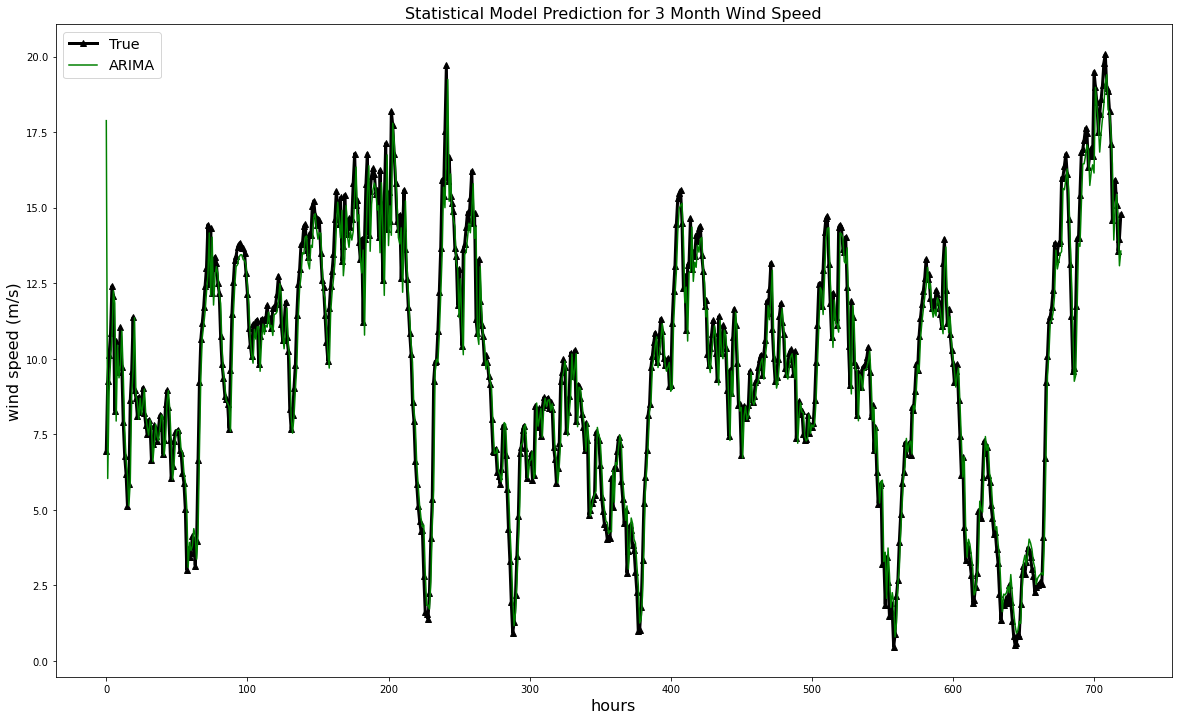

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(true,color='black',marker='^', mfc='black', label='True',lw=3)
plt.plot(predmst_t,label='ARIMA',color='green')
plt.title('Statistical Model Prediction for 3 Month Wind Speed',fontsize=16)
plt.ylabel('wind speed (m/s)',fontsize=16)
plt.xlabel('hours',fontsize=16)
plt.legend(fontsize='x-large')

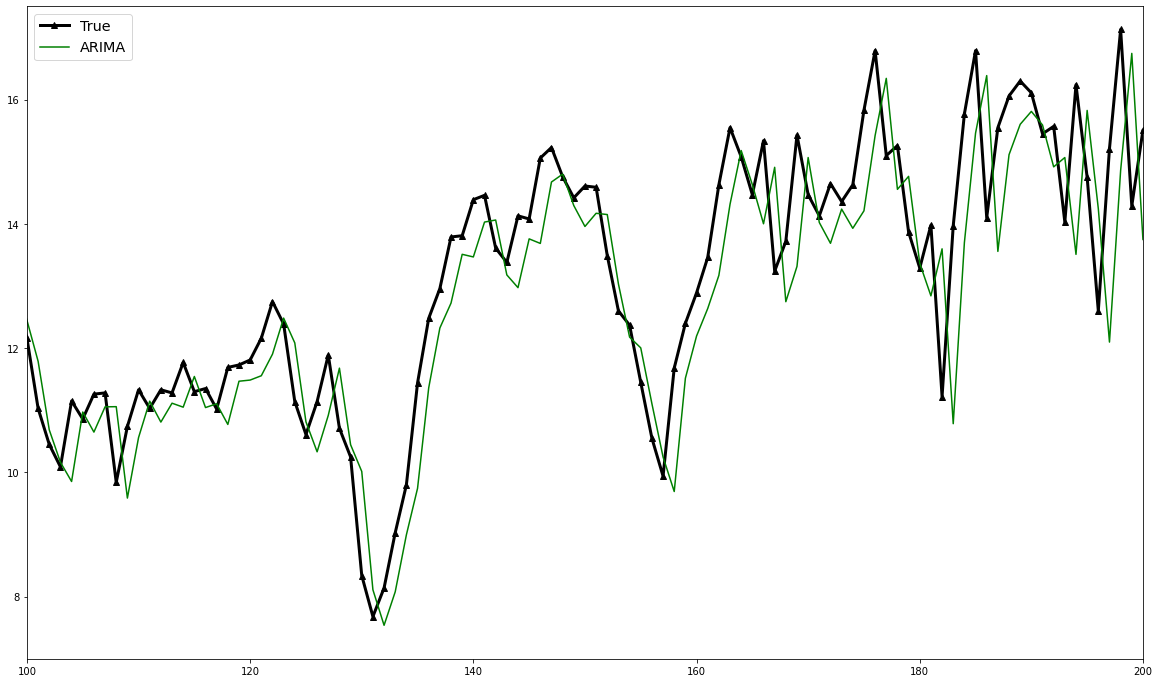

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(true,color='black',marker='^', mfc='black', label='True',lw=3)
plt.plot(predmst_t,label='ARIMA',color='green')
plt.xlim(100,200)
plt.ylim(7, 17.5)
plt.legend(fontsize='x-large')

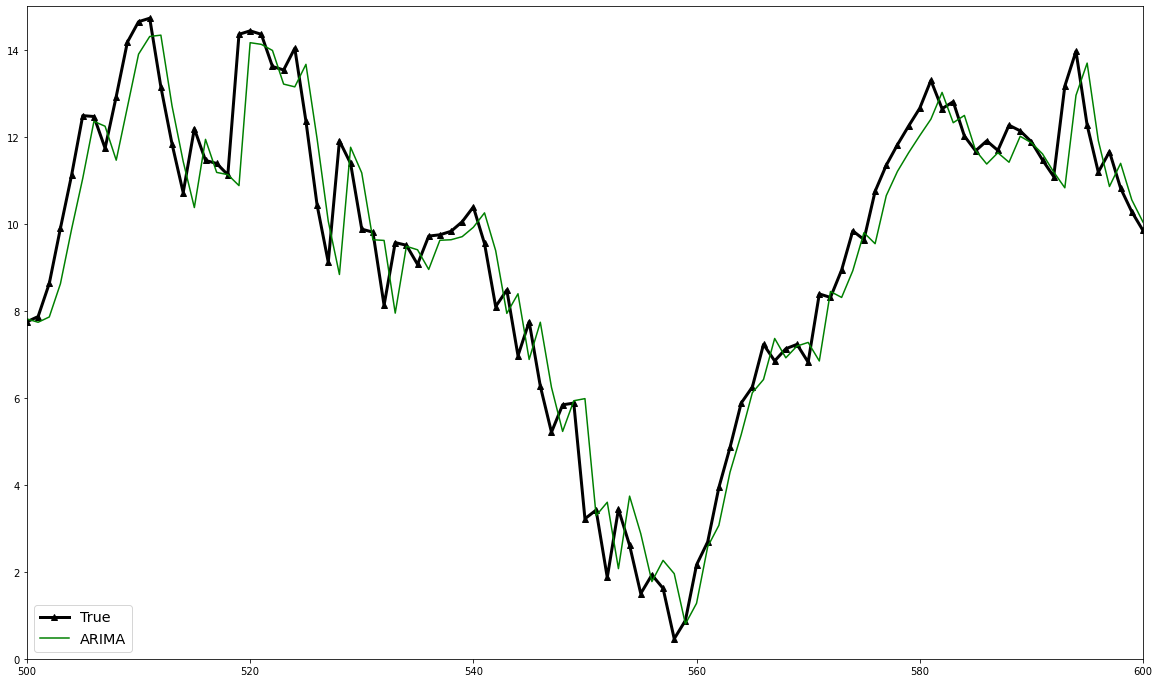

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(true,color='black',marker='^', mfc='black', label='True',lw=3)
plt.plot(predmst_t,label='ARIMA',color='green')
plt.xlim(500,600)
plt.ylim(0,15)
plt.legend(fontsize='x-large')

In [139]:
rmse_5 = mean_squared_error(true, predmst_t,squared='False')
rmse_list.append(rmse_5)

mape_1 = mean_absolute_percentage_error(true, predmst_t)
mape_list.append(mape_1)

b_1 = bias_S(true, predmst_t)
bias_list.append(b_1)
print(rmse_list)
print(mape_list)
print(bias_list)

[11.441493770737184, 9.043786001109693, 2.1830337345679016, 1.7051686833768347, 1.2869496438664456]
[45.91287115143018, 47.055883817611, 16.128717935589307, 14.97532471395841, 11.803350594040241]
[0.171709260666394, -0.1538573656949604, -0.013277777777777756, -0.03216213808745701, 0.1290934577189499]


In [142]:
print(mt)

91.54184460639954
